In [19]:
pip install -U scikit-learn

     |████████████████████████████████| 11.1 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 36.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Data

#### Our data comes from a Kaggle competition named “House Prices: Advanced Regression Techniques”. It contains 1460 training data points and 80 features that might help us predict the selling price of a house.



#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#### Load the data

In [2]:
data = pd.read_csv('house.csv')
data

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
data.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

### Drop the missing values

In [7]:
data = data.dropna()
data

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


#### VISUALIZATION

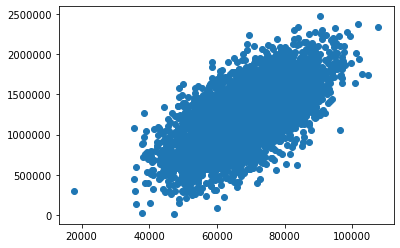

In [6]:
plt.scatter(data.Avg_Area_Income,data.Price)

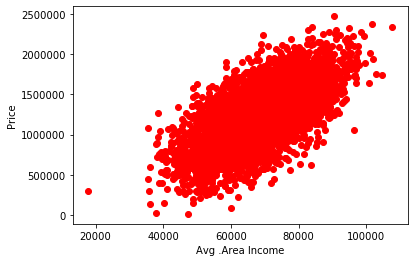

In [7]:
plt.xlabel('Avg .Area Income')
plt.ylabel('Price')
plt.scatter(data.Avg_Area_Income,data.Price,color='red')

In [9]:
reg = linear_model.LinearRegression()
reg.fit(data[['Avg_Area_Income','Avg_Area_House_Age','Avg_Area_Number_of_Rooms','Area_Population']],data.Price)

LinearRegression()

In [10]:
reg.coef_

array([2.15827436e+01, 1.65657872e+05, 1.21598165e+05, 1.51961198e+01])

In [11]:
reg.intercept_

-2637560.6725511416

In [13]:
reg.feature_names_in_

array(['Avg_Area_Income', 'Avg_Area_House_Age',
       'Avg_Area_Number_of_Rooms', 'Area_Population'], dtype=object)

In [19]:
reg.predict([[79248.64245 ,6.002900, 6.730821, 40173.07217 ]])

/home/jifana/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1496200.39658469])

In [21]:
2.15827436e+01*79248.64245+1.65657872e+05*6.002900+1.21598165e+05*6.730821+1.51961198e+01*40173.07217+-2637560.6725511416

1496200.3978969152

In [23]:
from sklearn.metrics import mean_squared_error

y_true = data.Price
y_pred = reg.predict(data[['Avg_Area_Income','Avg_Area_House_Age','Avg_Area_Number_of_Rooms','Area_Population']])
mean_squared_error(y_true, y_pred)

10222991909.315287

In [25]:
mean_squared_error(y_true, y_pred, squared=False)

101108.81222383777

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

81346.88868597167